/Users/vladimirnikitin/miniconda3/envs/env/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/Users/vladimirnikitin/miniconda3/envs/env/lib/python3.11/site-packages/skfuzzy/control/controlsystem.py:133: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


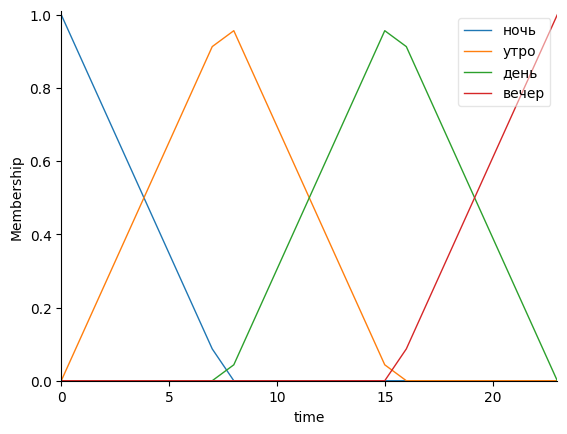

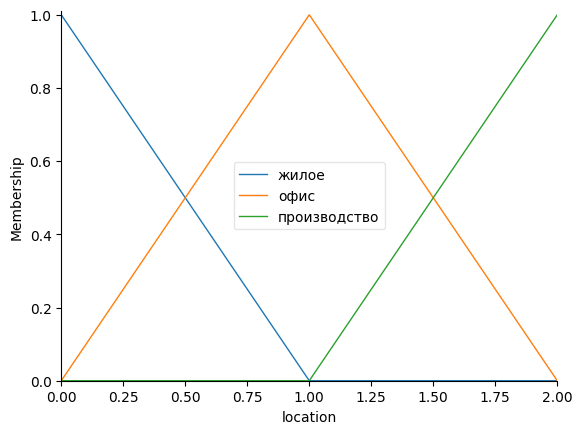

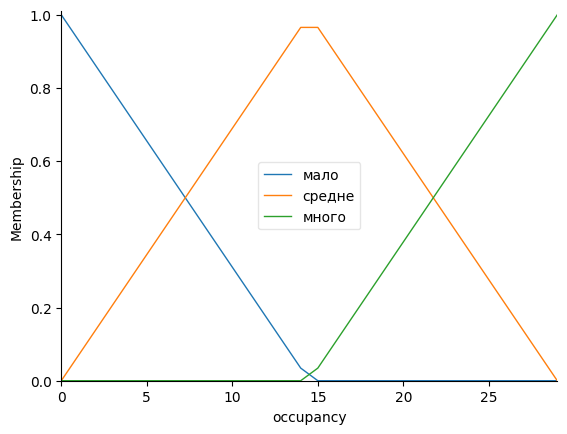

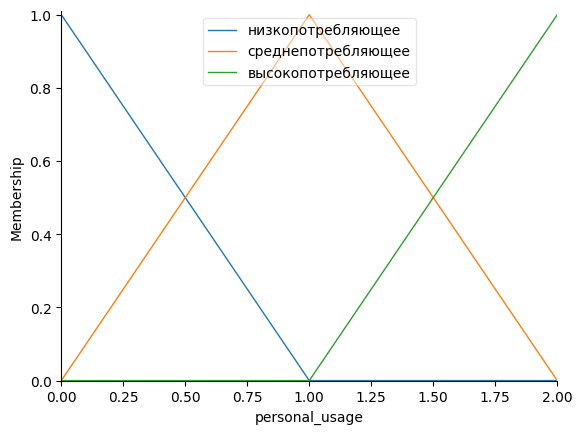

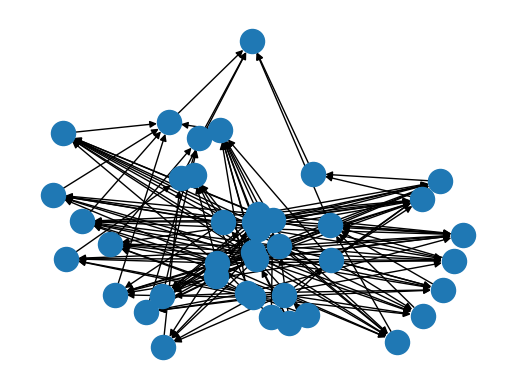

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Входные переменные
time = ctrl.Antecedent(np.arange(0, 24, 1), 'time')  # временной диапазон (0-23)
location = ctrl.Antecedent(np.arange(0, 3, 1), 'location')  # 0 - жилое, 1 - офис, 2 - производство
occupancy = ctrl.Antecedent(np.arange(0, 30, 1), 'occupancy')  # допустимое количество людей
personal_usage = ctrl.Antecedent(np.arange(0, 3, 1), 'personal_usage')  # 0 - почти не используется, 1 - рутинная потребность, 2 - высокое потребление при работе

# Выходная переменная
usage_level = ctrl.Consequent(np.arange(0, 101, 1), 'usage_level')  # в процентном отношении

# Нечеткие множества
time.automf(names=['ночь', 'утро', 'день', 'вечер'])
location['жилое'] = fuzz.trimf(location.universe, [0, 0, 1])
location['офис'] = fuzz.trimf(location.universe, [1, 1, 2])
location['производство'] = fuzz.trimf(location.universe, [2, 2, 2])
occupancy.automf(names=['мало', 'средне', 'много'])
personal_usage['низкопотребляющее'] = fuzz.trimf(personal_usage.universe, [0, 0, 1])
personal_usage['среднепотребляющее'] = fuzz.trimf(personal_usage.universe, [1, 1, 2])
personal_usage['высокопотребляющее'] = fuzz.trimf(personal_usage.universe, [2, 2, 2])
usage_level.automf(names=['очень низкий', 'низкий', 'средний', 'высокий', 'очень высокий'])

# Правила - добавить больше количество комбинаций и сценариев обработки
# Для жилого помещения
rule0 = ctrl.Rule(time['ночь'] & location['жилое'] & (occupancy['мало']|occupancy['средне']) & personal_usage['низкопотребляющее'], usage_level['очень низкий'])
rule1 = ctrl.Rule(time['ночь'] & location['жилое'] & (occupancy['мало']|occupancy['средне']|occupancy['много']) & personal_usage['среднепотребляющее'] | time['ночь'] & location['жилое'] & occupancy['много'] & personal_usage['низкопотребляющее'], usage_level['низкий'])
rule2 = ctrl.Rule(time['ночь'] & location['жилое'] & (occupancy['мало']|occupancy['средне']|occupancy['много']) & personal_usage['высокопотребляющее'], usage_level['средний'])
rule3 = ctrl.Rule((time['утро'] | time['день'] | time['вечер']) & location['жилое'] & (occupancy['мало']|occupancy['средне']) & personal_usage['низкопотребляющее'], usage_level['низкий'])
rule4 = ctrl.Rule((time['утро'] | time['день'] | time['вечер']) & location['жилое'] & (occupancy['много']) & personal_usage['низкопотребляющее'] | (time['утро'] | time['день'] | time['вечер']) & location['жилое'] & (occupancy['мало']|occupancy['средне']) & personal_usage['среднепотребляющее'], usage_level['средний'])
rule5 = ctrl.Rule((time['утро'] | time['день'] | time['вечер']) & location['жилое'] & (occupancy['много']) & (personal_usage['среднепотребляющее'] | personal_usage['высокопотребляющее']) | (time['утро'] | time['день'] | time['вечер']) & location['жилое'] & (occupancy['мало']|occupancy['средне']) & personal_usage['высокопотребляющее'], usage_level['высокий'])

# Для офиса
rule6 = ctrl.Rule(time['ночь'] & location['офис'] & (occupancy['мало']|occupancy['средне']) & personal_usage['низкопотребляющее'], usage_level['очень низкий'])
rule7 = ctrl.Rule(time['ночь'] & location['офис'] & (occupancy['мало']|occupancy['средне']|occupancy['много']) & personal_usage['среднепотребляющее'] | time['ночь'] & location['жилое'] & occupancy['много'] & personal_usage['низкопотребляющее'], usage_level['низкий'])
rule8 = ctrl.Rule(time['ночь'] & location['офис'] & (occupancy['мало']|occupancy['средне']|occupancy['много']) & personal_usage['высокопотребляющее'], usage_level['средний'])
rule9 = ctrl.Rule((time['утро'] | time['день'] | time['вечер']) & location['офис'] & (occupancy['мало']|occupancy['средне']) & personal_usage['низкопотребляющее'], usage_level['средний'])
rule10 = ctrl.Rule((time['утро'] | time['день'] | time['вечер']) & location['офис'] & (occupancy['много']) & personal_usage['низкопотребляющее'] | (time['утро'] | time['день'] | time['вечер']) & location['офис'] & (occupancy['мало']|occupancy['средне']) & personal_usage['среднепотребляющее'], usage_level['высокий'])
rule11 = ctrl.Rule((time['утро'] | time['день'] | time['вечер']) & location['офис'] & (occupancy['много']) & (personal_usage['среднепотребляющее'] | personal_usage['высокопотребляющее']) | (time['утро'] | time['день'] | time['вечер']) & location['офис'] & (occupancy['мало']|occupancy['средне']) & personal_usage['высокопотребляющее'], usage_level['очень высокий'])

# Для производства
rule12 = ctrl.Rule(time['ночь'] & location['производство'] & (occupancy['мало']) & personal_usage['низкопотребляющее'], usage_level['очень низкий'])
rule13 = ctrl.Rule(time['ночь'] & location['производство'] & (occupancy['мало']|occupancy['средне']|occupancy['много']) & personal_usage['среднепотребляющее'] | time['ночь'] & location['производство'] & (occupancy['много']|occupancy['средне']) & personal_usage['низкопотребляющее'], usage_level['средний'])
rule14 = ctrl.Rule(time['ночь'] & location['производство'] & (occupancy['мало']|occupancy['средне']|occupancy['много']) & personal_usage['высокопотребляющее'], usage_level['высокий'])
rule15 = ctrl.Rule((time['утро'] | time['день'] | time['вечер']) & location['производство'] & (occupancy['мало']|occupancy['средне']) & personal_usage['низкопотребляющее'], usage_level['высокий'])
rule16 = ctrl.Rule((time['утро'] | time['день'] | time['вечер']) & location['производство'] & (occupancy['много']) & personal_usage['низкопотребляющее'] | (time['утро'] | time['день'] | time['вечер']) & location['производство'] & (occupancy['мало']|occupancy['средне']) & personal_usage['среднепотребляющее'], usage_level['высокий'])
rule17 = ctrl.Rule((time['утро'] | time['день'] | time['вечер']) & location['производство'] & (occupancy['много']) & (personal_usage['среднепотребляющее'] | personal_usage['высокопотребляющее']) | (time['утро'] | time['день'] | time['вечер']) & location['производство'] & (occupancy['мало']|occupancy['средне']) & personal_usage['высокопотребляющее'], usage_level['очень высокий'])

# Создание и симуляция контроллера
control_system = ctrl.ControlSystem([rule0, rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17])
simulation = ctrl.ControlSystemSimulation(control_system)

time.view()
location.view()
occupancy.view()
personal_usage.view()
control_system.view()

In [2]:
# Функция для получения случайного времени
def get_random_time():
    return np.random.randint(0, 24)

# Функция для получения случайного типа локации
def get_random_location():
    return np.random.randint(0, 3)

# Функция для получения случайного количества людей
def get_random_occupancy():
    return np.random.randint(0, 30)

# Функция для получения случайного уровня личного использования
def get_random_personal_usage():
    return np.random.randint(0, 3)

In [3]:
# Словари для описания значений
location_descriptions = {0: "жилое", 1: "офис", 2: "производство"}
personal_usage_descriptions = {0: "почти не используется", 1: "рутинная потребность", 2: "высокое потребление при работе"}

random_time = get_random_time()
random_location = get_random_location()
random_occupancy = get_random_occupancy()
random_personal_usage = get_random_personal_usage()

location_description = location_descriptions[random_location]
personal_usage_description = personal_usage_descriptions[random_personal_usage]

# Вывод информации
print(f"Случайное время: {random_time} ч.")
print(f"Случайная локация: {random_location} ({location_description})")
print(f"Случайное количество людей: {random_occupancy}")
print(f"Случайный уровень личного использования: {random_personal_usage} ({personal_usage_description})")

simulation.input['time'] = random_time 
simulation.input['location'] = random_location
simulation.input['occupancy'] = random_occupancy
simulation.input['personal_usage'] = random_personal_usage  

Случайное время: 1 ч.
Случайная локация: 2 (производство)
Случайное количество людей: 19
Случайный уровень личного использования: 2 (высокое потребление при работе)


Уровень энергопотребления: 75.2266109667761


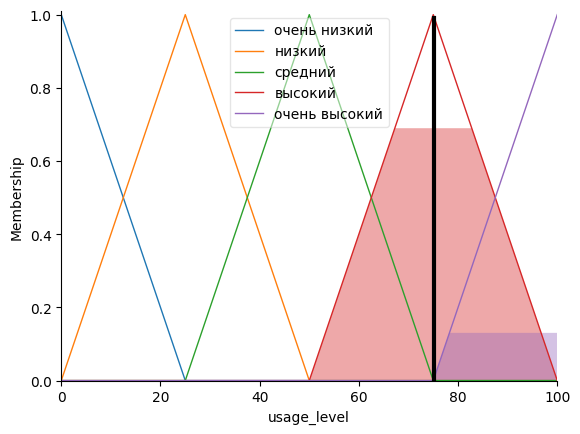

In [4]:
# Вычисление результата
simulation.compute()
print(f"Уровень энергопотребления: {simulation.output['usage_level']}")

# Визуализация результата - добавить выводы графов и 3д графика
usage_level.view(sim=simulation)

Случайное время: 6 ч.
Случайная локация: 2 (производство)
Случайное количество людей: 17
Случайный уровень личного использования: 1 (высокое потребление при работе)
Уровень энергопотребления: 68.91618854031088


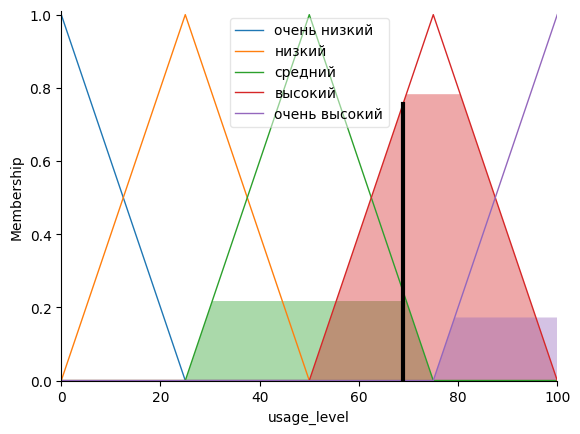

In [5]:
random_time = get_random_time()
random_location = get_random_location()
random_occupancy = get_random_occupancy()
random_personal_usage = get_random_personal_usage()
simulation.input['time'] = random_time 
simulation.input['location'] = random_location
simulation.input['occupancy'] = random_occupancy
simulation.input['personal_usage'] = random_personal_usage  
simulation.compute()
print(f"Случайное время: {random_time} ч.")
print(f"Случайная локация: {random_location} ({location_description})")
print(f"Случайное количество людей: {random_occupancy}")
print(f"Случайный уровень личного использования: {random_personal_usage} ({personal_usage_description})")
print(f"Уровень энергопотребления: {simulation.output['usage_level']}")

# Визуализация результата - добавить выводы графов и 3д графика
usage_level.view(sim=simulation)

Случайное время: 15 ч.
Случайная локация: 1 (производство)
Случайное количество людей: 2
Случайный уровень личного использования: 1 (высокое потребление при работе)
Уровень энергопотребления: 74.99999999999999


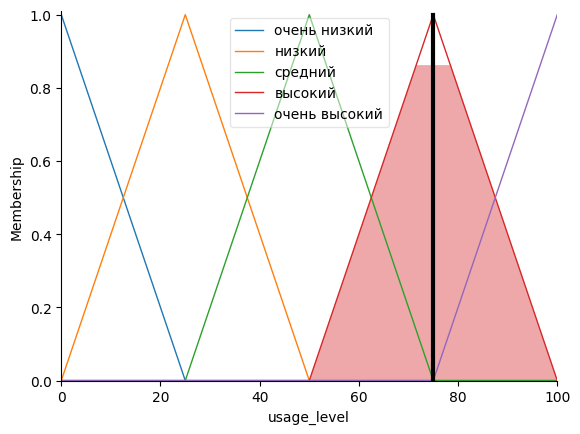

In [6]:
random_time = get_random_time()
random_location = get_random_location()
random_occupancy = get_random_occupancy()
random_personal_usage = get_random_personal_usage()
simulation.input['time'] = random_time 
simulation.input['location'] = random_location
simulation.input['occupancy'] = random_occupancy
simulation.input['personal_usage'] = random_personal_usage  
simulation.compute()
print(f"Случайное время: {random_time} ч.")
print(f"Случайная локация: {random_location} ({location_description})")
print(f"Случайное количество людей: {random_occupancy}")
print(f"Случайный уровень личного использования: {random_personal_usage} ({personal_usage_description})")
print(f"Уровень энергопотребления: {simulation.output['usage_level']}")

# Визуализация результата - добавить выводы графов и 3д графика
usage_level.view(sim=simulation)

Случайное время: 2 ч.
Случайная локация: 0 (производство)
Случайное количество людей: 24
Случайный уровень личного использования: 1 (высокое потребление при работе)
Уровень энергопотребления: 42.38329052158577


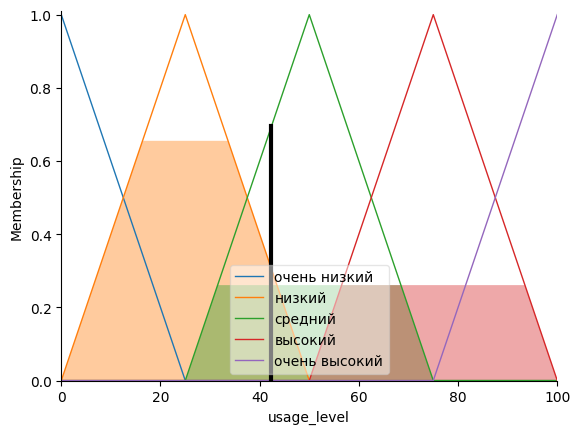

In [7]:
random_time = get_random_time()
random_location = get_random_location()
random_occupancy = get_random_occupancy()
random_personal_usage = get_random_personal_usage()
simulation.input['time'] = random_time 
simulation.input['location'] = random_location
simulation.input['occupancy'] = random_occupancy
simulation.input['personal_usage'] = random_personal_usage  
simulation.compute()
print(f"Случайное время: {random_time} ч.")
print(f"Случайная локация: {random_location} ({location_description})")
print(f"Случайное количество людей: {random_occupancy}")
print(f"Случайный уровень личного использования: {random_personal_usage} ({personal_usage_description})")
print(f"Уровень энергопотребления: {simulation.output['usage_level']}")

# Визуализация результата - добавить выводы графов и 3д графика
usage_level.view(sim=simulation)

Случайное время: 23 ч.
Случайная локация: 1 (производство)
Случайное количество людей: 29
Случайный уровень личного использования: 2 (высокое потребление при работе)
Уровень энергопотребления: 91.66666666666666


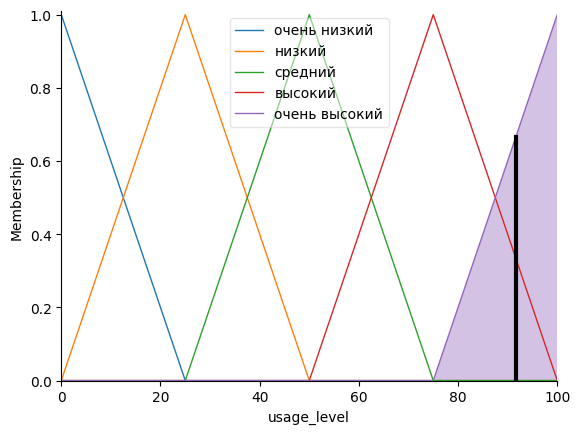

In [8]:
random_time = get_random_time()
random_location = get_random_location()
random_occupancy = get_random_occupancy()
random_personal_usage = get_random_personal_usage()
simulation.input['time'] = random_time 
simulation.input['location'] = random_location
simulation.input['occupancy'] = random_occupancy
simulation.input['personal_usage'] = random_personal_usage  
simulation.compute()
print(f"Случайное время: {random_time} ч.")
print(f"Случайная локация: {random_location} ({location_description})")
print(f"Случайное количество людей: {random_occupancy}")
print(f"Случайный уровень личного использования: {random_personal_usage} ({personal_usage_description})")
print(f"Уровень энергопотребления: {simulation.output['usage_level']}")

# Визуализация результата - добавить выводы графов и 3д графика
usage_level.view(sim=simulation)

Сила торможения: 89.81349545226558


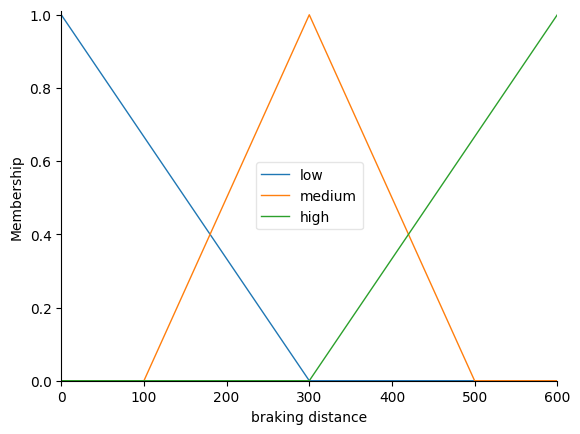

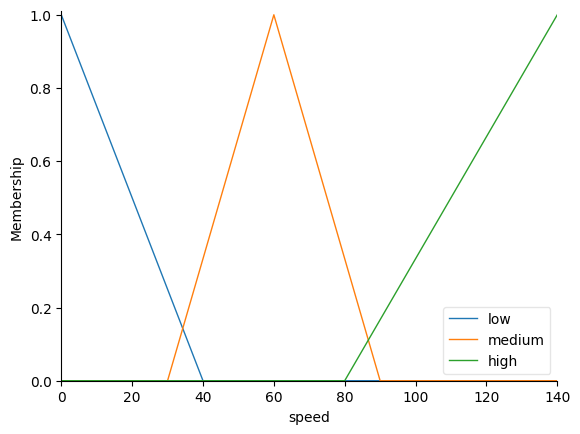

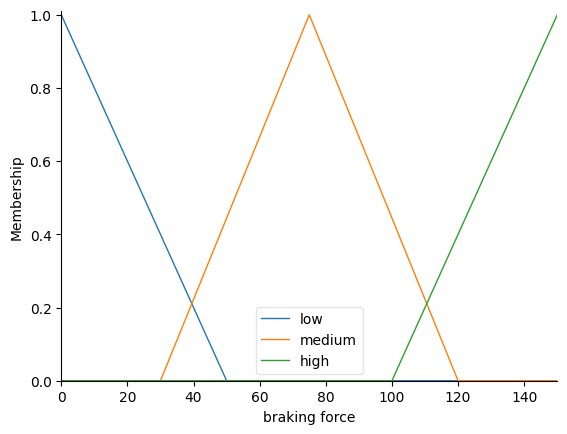

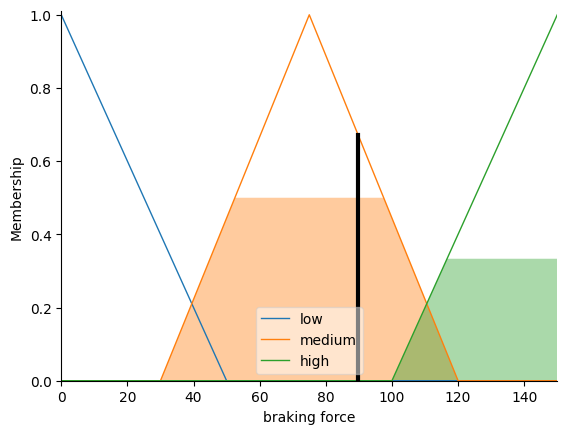

In [12]:
# Определение диапазонов для каждой переменной
S = ctrl.Antecedent(np.arange(0, 601, 1), 'braking distance')
V = ctrl.Antecedent(np.arange(0, 141, 1), 'speed')
F = ctrl.Consequent(np.arange(0, 151, 1), 'braking force')

# Определение функций принадлежности для тормозного пути
S['low'] = fuzz.trimf(S.universe, [0, 0, 300])
S['medium'] = fuzz.trimf(S.universe, [100, 300, 500])
S['high'] = fuzz.trimf(S.universe, [300, 600, 600])

# Определение функций принадлежности для скорости
V['low'] = fuzz.trimf(V.universe, [0, 0, 40])
V['medium'] = fuzz.trimf(V.universe, [30, 60, 90])
V['high'] = fuzz.trimf(V.universe, [80, 140, 140])

# Определение функций принадлежности для силы торможения
F['low'] = fuzz.trimf(F.universe, [0, 0, 50])
F['medium'] = fuzz.trimf(F.universe, [30, 75, 120])
F['high'] = fuzz.trimf(F.universe, [100, 150, 150])

# Создание правил для нечёткого вывода
rule1 = ctrl.Rule(S['high'] & V['high'], F['high'])
rule2 = ctrl.Rule(S['medium'] | V['medium'], F['medium'])
rule3 = ctrl.Rule(S['low'] & V['low'], F['low'])

braking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
braking = ctrl.ControlSystemSimulation(braking_ctrl)

# Ввод значения S и V
braking.input['braking distance'] = 400
braking.input['speed'] = 120

# Вычисление нечёткого вывода
braking.compute()

print(f"Сила торможения: {braking.output['braking force']}")

# Графическое представление функций принадлежности
S.view()
V.view()
F.view()
F.view(sim=braking)

